In [2]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

## Samples ellipticity

In [3]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_64/shape_samples.npz")

In [4]:
ep = ds['e1e2p']
em = ds['e1e2m']

In [5]:
ep.shape

(30000, 300, 2)

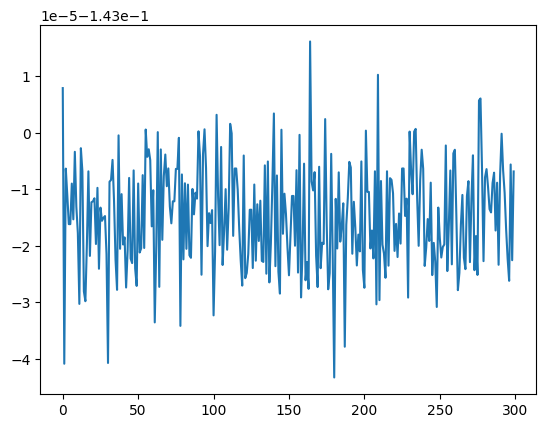

In [30]:
plt.plot(ep[13, :, 0])

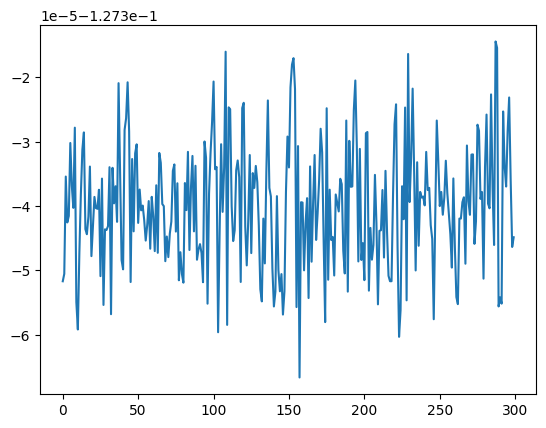

In [31]:
plt.plot(em[17, :, 0])

## Bootstrap 

In [40]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_47/g_samples_boots_472.npz")# 100k galaxies, 0.2 shape noise 

In [59]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_48/g_samples_boots_482.npz") # 200k galaxies, 0.2 shape noise 

In [60]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_49/g_samples_boots_492.npz")

In [61]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_45/g_samples_boots_452.npz") # shape_noise = 0.01, N_gal = 10k

In [80]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_50/g_samples_boots_502.npz")

In [ ]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_60/g_samples_boots_602.npz")


In [2]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_62/g_samples_boots_622.npz")


In [15]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_63/g_samples_boots_632.npz")

In [6]:
 ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_64/g_samples_boots_642.npz")

In [7]:
ds.keys()

dict_keys(['g_minus', 'g_plus'])

In [8]:
ds['g_plus'].shape

(500, 1000, 2)

In [9]:
gps = ds['g_plus']
gms = ds['g_minus']

In [10]:
gp1_mean = gps[:, :, 0].mean(axis=1)
gm1_mean = gms[:, :, 0].mean(axis=1)
gp1_mean.shape

(500,)

(array([  4.,  15.,  32.,  82., 141., 125.,  66.,  25.,   8.,   1.,   1.]),
 array([0.01703888, 0.01776556, 0.01849224, 0.01921892, 0.0199456 ,
        0.02067228, 0.02139896, 0.02212564, 0.02285232, 0.02357899,
        0.02430567, 0.02503235]),
 <BarContainer object of 11 artists>)

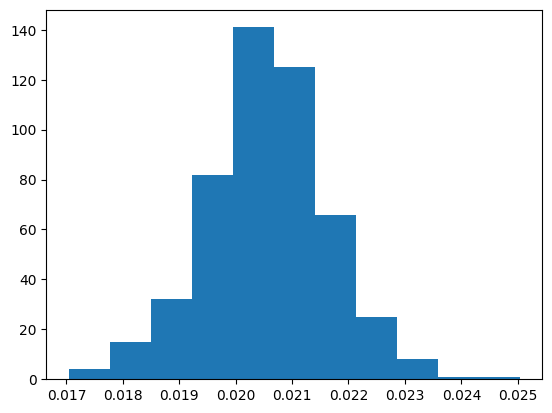

In [11]:
plt.hist(gp1_mean, bins=11)

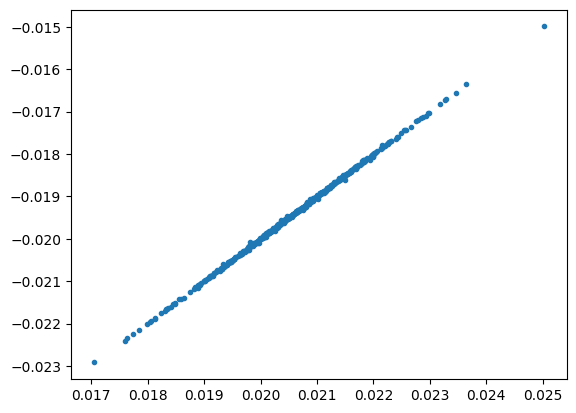

In [12]:
plt.plot(gp1_mean, gm1_mean,'o',  markersize=3, ) 

In [13]:
_cov = np.cov(gp1_mean, gm1_mean)
_cov

array([[1.14114658e-06, 1.13933869e-06],
       [1.13933869e-06, 1.13795886e-06]])

In [14]:
_mvar = (_cov[0, 0] + _cov[1, 1] - 2 * _cov[1, 0]) * (1 / 4 / 0.02**2)
np.sqrt(_mvar)

np.float64(0.0005172440949080395)

In [15]:
m_boot = (gp1_mean - gm1_mean) / 2/ 0.02 - 1

(array([  1.,   2.,   3.,  17.,  47., 263., 115.,  36.,  12.,   3.,   1.]),
 array([-0.00274482, -0.0022629 , -0.00178099, -0.00129907, -0.00081716,
        -0.00033524,  0.00014668,  0.00062859,  0.00111051,  0.00159242,
         0.00207434,  0.00255626]),
 <BarContainer object of 11 artists>)

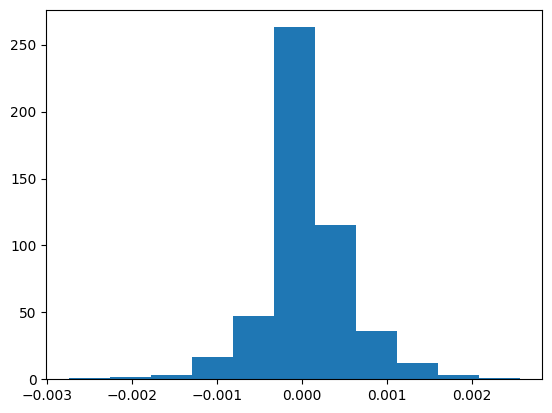

In [16]:
plt.hist(m_boot, bins=11)

In [17]:
m_boot.mean(),  m_boot.std()

(np.float64(4.683123781031528e-05), np.float64(0.0005167265919326972))

In [18]:
2e-3 / m_boot.std()

np.float64(3.8705188221869116)

In [14]:
m_boot.mean() / m_boot.std()

np.float64(-0.0375755752068412)

## Multiple experiments

In [95]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_50/mc_exp_samples_504.npz")

In [96]:
ds['m'].shape

(500,)

(array([  1.,   0.,   0.,   3.,   3.,   2.,  10.,   7.,  20.,  23.,  40.,
         90., 220.,  33.,  18.,  10.,   7.,   5.,   2.,   5.,   1.]),
 array([-2.94968714e-04, -2.78784215e-04, -2.62599716e-04, -2.46415217e-04,
        -2.30230717e-04, -2.14046218e-04, -1.97861719e-04, -1.81677220e-04,
        -1.65492720e-04, -1.49308221e-04, -1.33123722e-04, -1.16939223e-04,
        -1.00754724e-04, -8.45702244e-05, -6.83857252e-05, -5.22012259e-05,
        -3.60167267e-05, -1.98322275e-05, -3.64772830e-06,  1.25367709e-05,
         2.87212701e-05,  4.49057694e-05]),
 <BarContainer object of 21 artists>)

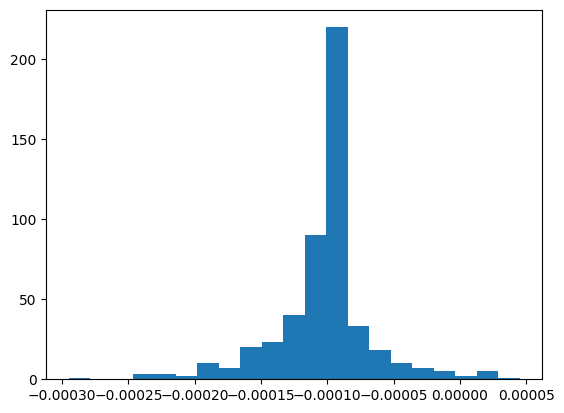

In [97]:
plt.hist(ds['m'], bins=21)

In [100]:
ds['m'].mean(), ds['m'].std()

(np.float64(-0.00010393983434536502), np.float64(3.6902466865459636e-05))

In [99]:
ds['m'].mean() / ds['m'].std()

np.float64(-2.8166093807309056)

## Jacks

In [81]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_45/tmp2/g_samples_jacks_452.npz")

In [82]:
ds['g_plus'].shape

(100, 1000, 2)

In [83]:
gps = ds['g_plus']
gms = ds['g_minus']

In [84]:
gp1_mean = gps[:, :, 0].mean(axis=1)
gm1_mean = gms[:, :, 0].mean(axis=1)
gp1_mean.shape

(100,)

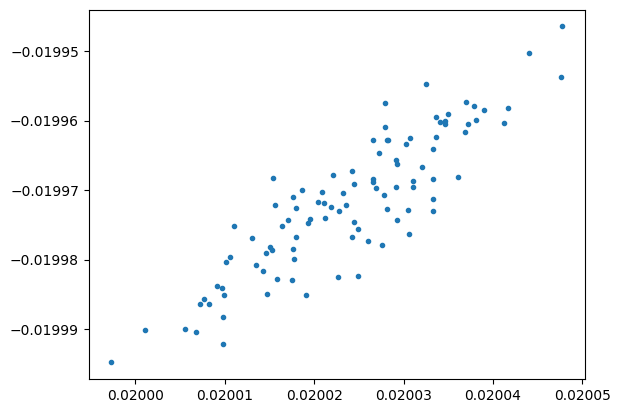

In [85]:
plt.plot(gp1_mean, gm1_mean,'o',  markersize=3, ) 

In [97]:
_cov = np.cov(gp1_mean, gm1_mean)
_cov

array([[1.07499854e-10, 9.08745934e-11],
       [9.08745934e-11, 9.89337949e-11]])

In [91]:
m_jacks = (gp1_mean - gm1_mean) / 2 / 0.02 - 1

In [63]:
_mvar = (_cov[0, 0] + _cov[1, 1] - 2 * _cov[1, 0]) * (1 / 4 / 0.02**2)
np.sqrt(_mvar)

np.float64(0.00012420865052885854)

(array([ 2.,  3.,  9., 12., 29., 14., 11.,  9.,  6.,  5.]),
 array([-4.10151122e-04, -3.50813729e-04, -2.91476335e-04, -2.32138942e-04,
        -1.72801548e-04, -1.13464155e-04, -5.41267612e-05,  5.21063228e-06,
         6.45480258e-05,  1.23885419e-04,  1.83222813e-04]),
 <BarContainer object of 10 artists>)

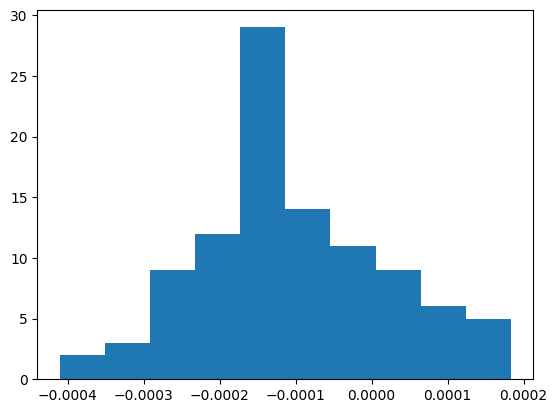

In [54]:
plt.hist(m_jacks)

In [57]:
m_jacks.mean(), m_jacks.std()

(np.float64(-0.00010716381596966085), np.float64(0.0001235860468561769))

In [58]:
np.sqrt(m_jacks.var() * (m_jacks.shape[0] - 1))

np.float64(0.001229665640235661)